In [41]:
import pandas as pd

In [42]:
# Dataset containing the top 1m legit domains
dataset = pd.read_csv('top-1m.csv',names = ['ID','Domain'])

In [43]:
dataset.head()

,ID,Domain
0,1,google.com
1,2,youtube.com
2,3,facebook.com
3,4,baidu.com
4,5,wikipedia.org


In [44]:
dataset.tail()

,ID,Domain
999995,999996,sibf.org
999996,999997,bukapintu.co
999997,999998,klatovynet.cz
999998,999999,elconquistadorfm.cl
999999,1000000,laputertienda.com


In [45]:
# Removing everything after the dot(.)

T = dataset.iloc[:, 1].values
def remove_top_level_domain(my_list):
    T_split =[]
    for item in my_list:
        T_sliced = item.split('.')[0]
        T_split.append(T_sliced)
    return(T_split)

T =  remove_top_level_domain(T)

In [46]:
# Splitting each domain into a 3-gram

ngrams=[]
for n_string in T:
    n_string = str(n_string)
    if len(n_string)>=3:
        for i in range(len(n_string)-2):
            ngram = n_string[i]+n_string[i+1]+n_string[i+2]
            ngrams.append(ngram)
len(ngrams)

8003582

In [47]:
# Counting the occurrence of each unique domain

frequency_count = {}
for item in ngrams :
    if item in frequency_count:
        frequency_count[item] += 1
    else:
        frequency_count[item] = 1

In [48]:
# Extracting the unique 3-grams and storing into a dictionary

print("Unique 3-grams")
from collections import OrderedDict
import numpy as np
keys = list(frequency_count.keys())
values = list(frequency_count.values())
sorted_value_index = np.argsort(values)[::-1][:]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
len(sorted_dict)

Unique 3-grams


42900

In [49]:
sorted_dict

{'ing': 32314,
 'ine': 25297,
 'ion': 23151,
 'ent': 22869,
 'ter': 22604,
 'lin': 22138,
 'and': 19699,
 'the': 19091,
 'est': 18055,
 'tor': 17764,
 'por': 17723,
 'ers': 17532,
 'tra': 16919,
 'sta': 15700,
 'res': 14716,
 'ati': 14442,
 'art': 14321,
 'tio': 13909,
 'pro': 13834,
 'ort': 13683,
 'for': 13322,
 'ate': 13068,
 'ran': 12934,
 'ver': 12792,
 'ste': 12650,
 'ame': 12262,
 'mar': 12246,
 'all': 12009,
 'lan': 11963,
 'net': 11961,
 'nte': 11917,
 'one': 11855,
 'tal': 11698,
 'sto': 11644,
 'sho': 11582,
 'per': 11461,
 'are': 11454,
 'ide': 11441,
 'ist': 11439,
 'nli': 11418,
 'ess': 11274,
 'man': 11257,
 'rea': 11212,
 'onl': 11035,
 'ree': 10901,
 'ive': 10860,
 'con': 10763,
 'ore': 10597,
 'int': 10547,
 'dia': 10519,
 'com': 10377,
 'edi': 10373,
 'car': 10362,
 'ast': 10293,
 'new': 10268,
 'par': 10173,
 'ang': 10171,
 'ica': 10090,
 'tin': 10033,
 'eri': 10009,
 'ind': 9837,
 'ant': 9825,
 'str': 9699,
 'che': 9661,
 'wor': 9583,
 'ect': 9499,
 'our': 9494,
 '

In [50]:
ngram_frequencies= {key: frequency_count[key] / len(ngrams) for key in frequency_count.keys()}
keys = list(ngram_frequencies.keys())
values = list(ngram_frequencies.values())
sorted_value_index = np.argsort(values)[::-1][:]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
len(sorted_dict)

42900

In [51]:
out = {k: sorted_dict[k] for k in list(sorted_dict)[9900:10000]}
out

{'mwr': 5.997314702342026e-06,
 'xva': 5.997314702342026e-06,
 '150': 5.997314702342026e-06,
 'ka4': 5.997314702342026e-06,
 'gbs': 5.997314702342026e-06,
 'g-u': 5.997314702342026e-06,
 '210': 5.997314702342026e-06,
 'cpt': 5.997314702342026e-06,
 'cfs': 5.997314702342026e-06,
 'hnl': 5.997314702342026e-06,
 'usq': 5.997314702342026e-06,
 'ml-': 5.997314702342026e-06,
 '194': 5.997314702342026e-06,
 'qba': 5.997314702342026e-06,
 'gnf': 5.872370646043234e-06,
 'veq': 5.872370646043234e-06,
 'ta1': 5.872370646043234e-06,
 '-cp': 5.872370646043234e-06,
 'joj': 5.872370646043234e-06,
 'sgm': 5.872370646043234e-06,
 'jmi': 5.872370646043234e-06,
 'zyl': 5.872370646043234e-06,
 'gih': 5.872370646043234e-06,
 'yuh': 5.872370646043234e-06,
 '1mo': 5.872370646043234e-06,
 'zfe': 5.872370646043234e-06,
 'btm': 5.872370646043234e-06,
 'i-z': 5.872370646043234e-06,
 's88': 5.872370646043234e-06,
 'xgi': 5.872370646043234e-06,
 'hpt': 5.872370646043234e-06,
 'dtw': 5.872370646043234e-06,
 'zob': 

In [52]:
data = pd.DataFrame.from_dict([sorted_dict])
data = data.T
data.rename(columns={"0":"freq"}, inplace=True)
data.head()

,0
ing,0.004037
ine,0.003161
ion,0.002893
ent,0.002857
ter,0.002824


In [53]:
freq = list(sorted_dict.values())[:15000]
trigrams = list(range(0,22981))[:15000]

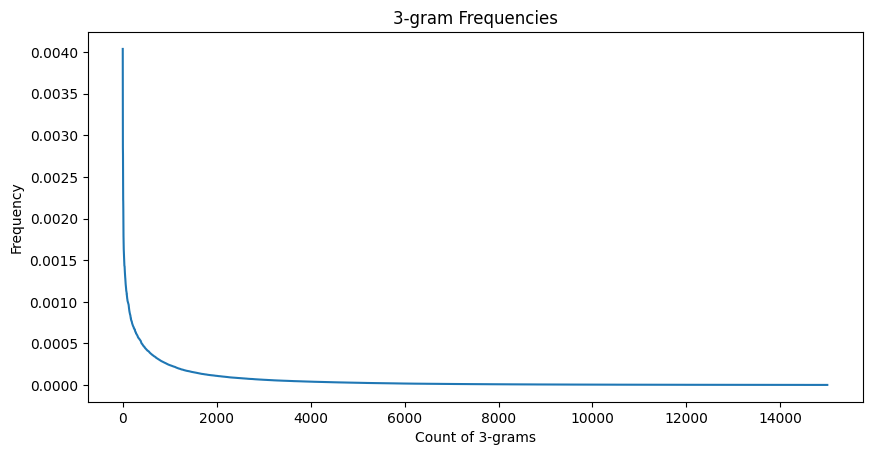

In [54]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(10)
plt.plot(trigrams,freq)
plt.xlabel("Count of 3-grams")
plt.ylabel("Frequency")
plt.title("3-gram Frequencies")
plt.show()

In [55]:
# import itertools
out = dict(sorted_dict.items())
type(out)
out = list(out.keys())
print(len(out))
print(type(out))

42900
<class 'list'>


In [56]:
# alphanumeric_list = []

# for item in out:
#     # check if each character in the string is alphanumeric
#     new_item = "".join(char for char in item if char.isalnum())
#     # if the string has at least one alphanumeric character, and all characters are alphabets or digits, add it to the new list
#     alphanumeric_list.append(new_item)
# print(len(alphanumeric_list))

In [57]:
# Considering only 3-grams containing alphabets and numbers

alphanumeric = []
for string in out:
    if string.isalnum() and len(string)==3:
        alphanumeric.append(string)
print(len(alphanumeric))
print(type(out))

39508
<class 'list'>


In [58]:
# subset_out = out[:10000]
alphanumeric_subset = alphanumeric[:10000]
print(alphanumeric_subset)
# for string in subset_out:
#     if string.isalpha() and len(string)==3:
#         alphanumeric_subset.append(string)
# print(len(alphanumeric_subset))

['ing', 'ine', 'ion', 'ent', 'ter', 'lin', 'and', 'the', 'est', 'tor', 'por', 'ers', 'tra', 'sta', 'res', 'ati', 'art', 'tio', 'pro', 'ort', 'for', 'ate', 'ran', 'ver', 'ste', 'ame', 'mar', 'all', 'lan', 'net', 'nte', 'one', 'tal', 'sto', 'sho', 'per', 'are', 'ide', 'ist', 'nli', 'ess', 'man', 'rea', 'onl', 'ree', 'ive', 'con', 'ore', 'int', 'dia', 'com', 'edi', 'car', 'ast', 'new', 'par', 'ang', 'ica', 'tin', 'eri', 'ind', 'ant', 'str', 'che', 'wor', 'ect', 'our', 'chi', 'log', 'ita', 'ons', 'der', 'ara', 'cha', 'age', 'ian', 'ana', 'ari', 'pla', 'ren', 'les', 'ade', 'ost', 'orn', 'ite', 'ina', 'min', 'tic', 'sti', 'ser', 'ard', 'ani', 'ele', 'tec', 'ech', 'lle', 'ama', 'anc', 'nes', 'ear', 'tur', 'tar', 'rad', 'ews', 'ell', 'ali', 'ban', 'tre', 'ome', 'nce', 'mat', 'mes', 'ale', 'med', 'men', 'gam', 'gra', 'shi', 'kin', 'des', 'era', 'her', 'hop', 'ark', 'web', 'mer', 'har', 'han', 'pre', 'fre', 'hin', 'eal', 'ner', 'ins', 'ice', 'ric', 'oto', 'ire', 'tes', 'nde', 'mon', 'tel', 'ies'

In [59]:
# with open('ngrams_alphanumeric.txt', 'w') as f:
#     for item in alphanumeric_subset:
#         f.write("%s " % item)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [61]:
CV = cv.fit_transform(alphanumeric_subset)

In [62]:
print(CV.shape)

(10000, 10000)


In [63]:
cv.fit_transform(alphanumeric_subset)
print(sorted(cv.vocabulary_.keys()))
features = cv.vocabulary_.keys()
features

['000', '001', '002', '003', '004', '005', '007', '008', '009', '00b', '00c', '00d', '00f', '00g', '00k', '00m', '00p', '00s', '00t', '010', '011', '012', '013', '014', '015', '016', '017', '018', '020', '021', '023', '024', '030', '040', '050', '051', '069', '080', '090', '0aa', '0ab', '0ac', '0ad', '0ae', '0be', '0co', '0da', '0de', '0do', '0ma', '0mb', '0mi', '0ne', '0pl', '0se', '100', '101', '102', '103', '104', '105', '106', '108', '109', '10b', '10m', '10p', '10s', '10t', '110', '111', '112', '113', '114', '115', '116', '118', '119', '120', '121', '122', '123', '125', '126', '128', '12c', '131', '133', '135', '138', '139', '141', '144', '150', '151', '155', '158', '160', '163', '168', '169', '173', '177', '180', '181', '188', '189', '18t', '190', '191', '192', '194', '196', '197', '198', '199', '1aa', '1ac', '1ad', '1af', '1ca', '1co', '1da', '1ga', '1ho', '1ma', '1mi', '1mo', '1ne', '1pa', '1po', '1pr', '1re', '1se', '1sh', '1st', '1te', '1tv', '1xb', '200', '201', '202', '204'

dict_keys(['ing', 'ine', 'ion', 'ent', 'ter', 'lin', 'and', 'the', 'est', 'tor', 'por', 'ers', 'tra', 'sta', 'res', 'ati', 'art', 'tio', 'pro', 'ort', 'for', 'ate', 'ran', 'ver', 'ste', 'ame', 'mar', 'all', 'lan', 'net', 'nte', 'one', 'tal', 'sto', 'sho', 'per', 'are', 'ide', 'ist', 'nli', 'ess', 'man', 'rea', 'onl', 'ree', 'ive', 'con', 'ore', 'int', 'dia', 'com', 'edi', 'car', 'ast', 'new', 'par', 'ang', 'ica', 'tin', 'eri', 'ind', 'ant', 'str', 'che', 'wor', 'ect', 'our', 'chi', 'log', 'ita', 'ons', 'der', 'ara', 'cha', 'age', 'ian', 'ana', 'ari', 'pla', 'ren', 'les', 'ade', 'ost', 'orn', 'ite', 'ina', 'min', 'tic', 'sti', 'ser', 'ard', 'ani', 'ele', 'tec', 'ech', 'lle', 'ama', 'anc', 'nes', 'ear', 'tur', 'tar', 'rad', 'ews', 'ell', 'ali', 'ban', 'tre', 'ome', 'nce', 'mat', 'mes', 'ale', 'med', 'men', 'gam', 'gra', 'shi', 'kin', 'des', 'era', 'her', 'hop', 'ark', 'web', 'mer', 'har', 'han', 'pre', 'fre', 'hin', 'eal', 'ner', 'ins', 'ice', 'ric', 'oto', 'ire', 'tes', 'nde', 'mon', 't

In [64]:
dga_data = pd.read_csv("dga_data_ready.csv")
dga_data = dga_data.sample(n = 10000, replace = False)
dga_data.groupby('isDGA').count()

,domain
isDGA,
dga,4981
legit,5019


In [65]:
#splitting the word in ngrams
def splitting_in_ngrams(input_word):
    input_word=str(input_word)
    s=''
    for i in range(len(input_word)-2):
        s1 = input_word[i:i+3]
        s = s + ' ' + s1 
    s = s[1:]
    return(s)

In [66]:
X_gram =[]
for i in range(len(dga_data)):
    temp = dga_data.iloc[i][1]
    temp = str(temp)
    temp = temp.lower()
    temp = splitting_in_ngrams(temp)
    X_gram.append(temp)

In [67]:
cv_train = cv.transform(X_gram).toarray()
df = pd.DataFrame(cv_train)
df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
num_cols = len(df.columns)
new_cols = ['f{}'.format(i) for i in range(1, num_cols + 1)]
df.columns = new_cols

In [69]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f9991,f9992,f9993,f9994,f9995,f9996,f9997,f9998,f9999,f10000
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.0,10000.000000,10000.0,10000.0000,10000.0,...,10000.0,10000.0,10000.000000,10000.0,10000.0000,10000.0,10000.0000,10000.0000,10000.0,10000.0
mean,0.001100,0.001200,0.0001,0.000200,0.000200,0.0,0.000200,0.0,0.0001,0.0,...,0.0,0.0,0.000300,0.0,0.0001,0.0,0.0001,0.0001,0.0,0.0
std,0.041218,0.037399,0.0100,0.014141,0.014141,0.0,0.014141,0.0,0.0100,0.0,...,0.0,0.0,0.017319,0.0,0.0100,0.0,0.0100,0.0100,0.0,0.0
min,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.0,...,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0
25%,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.0,...,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0
50%,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.0,...,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0
75%,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.0,...,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0
max,2.000000,2.000000,1.0000,1.000000,1.000000,0.0,1.000000,0.0,1.0000,0.0,...,0.0,0.0,1.000000,0.0,1.0000,0.0,1.0000,1.0000,0.0,0.0


In [70]:
dga_data.head()

,isDGA,domain
71229,dga,ytidmhswpwuwgmfhylnrt
12623,dga,blkbeiurbofofxfbqcmvy
107253,legit,lanrenzhijia
150434,legit,uromnews
123879,legit,hafizmohd


In [71]:
dga_data.tail()

,isDGA,domain
49183,dga,mjvwoofnvprc
138283,legit,nw
42041,dga,jctnxgktuwqvihq
56726,dga,dedjbmblzosxopbgmzdqgpfuepr
88300,legit,mosgorzdrav


In [72]:
y = dga_data.iloc[:,0].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y.shape

(10000,)

In [73]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.20, random_state = 0)

In [74]:
X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f9991,f9992,f9993,f9994,f9995,f9996,f9997,f9998,f9999,f10000
7389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
!pip install sklearn2pmml
import sklearn2pmml
from sklearn2pmml.pipeline import (PMMLPipeline)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
#Creating the Logistic regression Classifier that can be saved as PMML
from sklearn.linear_model import LogisticRegression
pmml_pipeline = PMMLPipeline(
    [
        (
            "classifier",
            LogisticRegression(random_state = 0),
        )
    ]
)
classifier = pmml_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn2pmml/pipeline/__init__.py:75: UserWarning: y is missing target field name(s)
  warnings.warn("y is missing target field name(s)")


In [77]:
## Save model to PMML
from sklearn2pmml import sklearn2pmml
#sklearn2pmml( pmml_pipeline, "Logistic_Regression_model.xml" )
sklearn2pmml(pmml_pipeline, "Logistic_Regression_model_1.pmml", with_repr=True)

In [78]:
y_pred = classifier.predict(X_test)

In [79]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[888  85]
 [219 808]]


0.848